In [95]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [28]:
df_facialemotions = pd.read_csv("./database/face_emotions_datalog.csv", names=["timestamp", "anger", "disgust", "fear", "happiness", "neutral", "sadness", "surprise"])
df_responses = pd.read_csv("./database/emotional_response_datalog.csv", names=["timestamp", "rating"])

df_responses.count()

timestamp    7
rating       7
dtype: int64

In [104]:
df_aggregated = pd.DataFrame(columns=df_facialemotions.columns)
df_aggregated['rating'] = -1

df_responses = df_responses.sort_values(by=['timestamp'])

lastTs = 0
for index, row in df_responses.iterrows():
    df_sub = df_facialemotions.query("timestamp > '{}' and timestamp <= '{}'".format(lastTs, row['timestamp']))
    df_sub = df_sub.drop('timestamp', axis=1)
    df_means_in_ts = pd.DataFrame(dict(df_sub.mean().to_dict(), **{'rating': row['rating']}), index=[index])
    df_means_in_ts['timestamp'] = row['timestamp']
    df_aggregated = pd.concat([df_aggregated, df_means_in_ts])

print(df_aggregated)


                    timestamp     anger       disgust      fear  happiness  \
0  2023-02-28 18:34:43.868902  0.038324  8.050105e-09  0.007373   0.000156   
1  2023-02-28 18:34:57.369062  0.069631  2.303690e-07  0.003952   0.000875   
2  2023-02-28 18:35:08.894508  0.066019  1.414924e-07  0.005146   0.000717   
3  2023-02-28 18:35:20.728299  0.070091  1.552306e-07  0.015833   0.000564   
4  2023-02-28 18:35:33.598723  0.061098  1.205867e-07  0.037446   0.000527   
5  2023-02-28 18:35:47.574339  0.050841  3.585776e-07  0.084991   0.001253   
6  2023-02-28 18:35:59.564440  0.069179  2.223915e-05  0.111936   0.001070   

    neutral   sadness  surprise  rating  
0  0.614884  0.339183  0.000078      10  
1  0.459898  0.465455  0.000189       7  
2  0.445338  0.482646  0.000133       8  
3  0.394045  0.519364  0.000103       8  
4  0.350332  0.539795  0.010800       9  
5  0.307525  0.546748  0.008641       6  
6  0.266575  0.543868  0.007349       5  


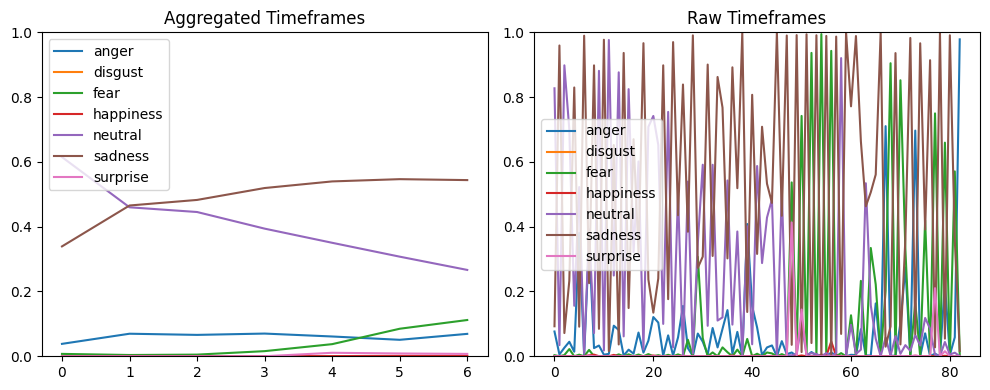

In [116]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))
df_aggregated.drop('rating', axis=1).plot(ax=ax1, title="Aggregated Timeframes", ylim=(0,1.0))
df_facialemotions.plot(ax=ax2, title="Raw Timeframes", ylim=(0,1.0))
plt.tight_layout()  